## Binomial calculator  
*Version 2023*  

The binomial distribution is given by

$$f_n(r) = \frac{n!}{r!(n-r!)} p^r (1-p)^{n-r}$$

This is the probability of $r$ successes out of $n$ trials, if the probability of success at each trial is $p$. Below we provide code cells to calculate (i) a single specific probabiity for a given $p,n,r$, (ii) the cumulative probability at $r$ and above for a given $n$, and (iii) the complete set of $f(r)$ values for a given $n$. Finally, we plot the $f(r)$ values.  

As usual, do Cell/Run All first, then you can edit parameters for specific cells. First, standard set-up.

In [13]:
from math import *  # basic maths routines
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt

#### (1) Single $f_n(r)$ values

In the code cell below, edit in the values of $p,n,r$ you want and then run the cell. Note that we have rounded down to two decimal places, but you can change that if you wish by uncommenting the extra line.

In [14]:
# Binomial calculator
p=0.3
n=6
r=2
f=stats.binom.pmf(r,n,p) # "pmf" stands for "probability mass function"
print('p=',p,'n=',n,'r=',r,'  ==> f=',round(f,2))
# print('p=',p,'n=',n,'r=',r,'  ==> f=',f)

p= 0.3 n= 6 r= 2   ==> f= 0.32


Its not hard to code up the binomial function yourself. Below is how you would do it. *You could try writing some extra code and comparing the results to see if you get the same answer...*

In [15]:
# Home grown Binomial calculator : P(r,n,p)
# prob of r successes out of n trials if expected fraction is p
def Bin(r,n,p) :
 P = (factorial(n)/(factorial(r)*factorial(n-r))) * p**r * (1-p)**(n-r)
 return P

#### (2) Cumulative $f_n(>r)$ values

In the code cell below, edit in the values of $p,n,r$ you want and then run the cell. Note that we are resetting all of $p,n,r$ to make sure we don't accidentally re-use values from the first calculator. Note that we have used a precision of three decimal places, but you can change this.

In [16]:
# Cumulative binomial calculator
p=0.5
n=8
r=3
fle=round(stats.binom.cdf(r,n,p),3) # summed prob at r and below
fge=round(stats.binom.sf(r,n,p),3) # summed prob above r
checksum=fge+fle
print('r=',r,'  n=',n,'  p=',p)
print('summed prob at r and below=',fle) # "cdf"= cumulative distbn fn.
print('summed prob above r=',fge)  # "sf" = survival function
print('(checksum=',checksum,')')
# note the "survival function" should be 1-cdf, but the Scipy docs
# say that sf is sometimes more accurate


r= 3   n= 8   p= 0.5
summed prob at r and below= 0.363
summed prob above r= 0.637
(checksum= 1.0 )


#### (3) Complete set of  $f_n(r)$ values

Here we set $p,n$ and then calculate $f(r)$ for all the possible $r$ values. Careful - if you set a large value of $n$ you will get a long output cell!

In [17]:
# set parameters
n=8 # total number of trials
p=0.3 # probability of success per trial

xr=np.arange(0,n+1) # set up array of r values
fr=np.zeros(len(xr)) # initialise array to hold f(r) values

# make fr
for i in range(0,len(xr)):
    fr[i]=round(stats.binom.pmf(xr[i],n,p),5)
    
print('p=',p,'n=',n,)
for i in range(0,len(xr)):
    print('r=',xr[i],'f(r)=',fr[i])

p= 0.3 n= 8
r= 0 f(r)= 0.05765
r= 1 f(r)= 0.19765
r= 2 f(r)= 0.29648
r= 3 f(r)= 0.25412
r= 4 f(r)= 0.13614
r= 5 f(r)= 0.04668
r= 6 f(r)= 0.01
r= 7 f(r)= 0.00122
r= 8 f(r)= 7e-05


#### (4) Plot the distribution

We will mark the mean and variance as well as plotting the distribution.


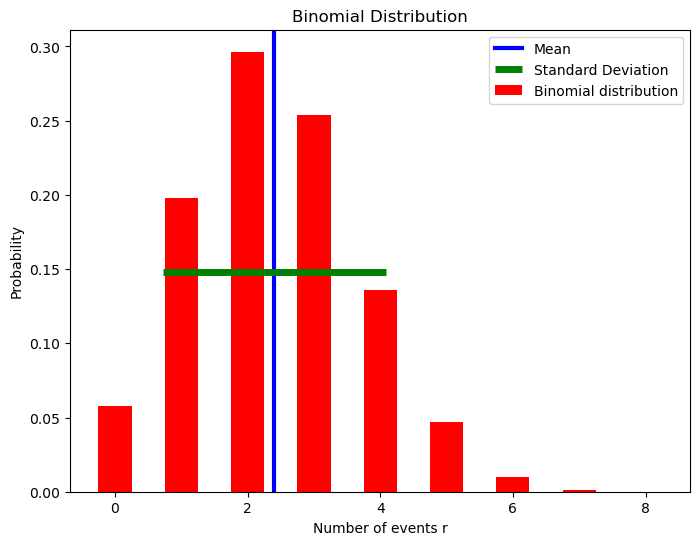

In [21]:
# calculate expected mean and standard deviation
mu=n*p
sig=n*p*(1.-p)
# Create a Matplotlib figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the binomial distribution with vertical bars
ax.bar(xr, fr, width=0.5, color='red', label='Binomial distribution')

# Draw the location of the mean
ax.axvline(mu, linewidth=3, color='blue', label='Mean')

# Draw a horizontal line to represent the standard deviation
ax.hlines(np.max(fr) / 2., mu - sig, mu + sig, linewidth=5, color='green', label='Standard Deviation')

# Set labels and title
ax.set_xlabel('Number of events r')
ax.set_ylabel('Probability')
ax.set_title('Binomial Distribution')

# Show legend
ax.legend()

# Show the Matplotlib plot
plt.show()


##Pascal's Triangle is intimately connected with the binomial distribution.
It is simply the coefficients in the expansion:
$$ ^nC_r= \frac{n!}{r!(n-r!)}$$

In [19]:
# Print Pascal's Triangle 
 
# set number of row
nrow = 10
neven=0 
nodd=0
for i in range(nrow):
    for j in range(nrow-i+1):
 
        # for left spacing
        print(end=" ")
 
    for j in range(i+1):
 
        # nCr = n!/((n-r)!*r!)
        pterm=factorial(i)//(factorial(j)*factorial(i-j))
        print(pterm, end=" ")
        if (pterm % 2) == 0: neven=neven+1
        else: nodd=nodd+1 
    # for new line
    print()
print(neven,nodd)    

           1 
          1 1 
         1 2 1 
        1 3 3 1 
       1 4 6 4 1 
      1 5 10 10 5 1 
     1 6 15 20 15 6 1 
    1 7 21 35 35 21 7 1 
   1 8 28 56 70 56 28 8 1 
  1 9 36 84 126 126 84 36 9 1 
22 33
